In [86]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [88]:
import pandas as pd

# Load dataset (check the correct filename from uploaded)
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
import os
os.makedirs("models", exist_ok=True)
os.makedirs("outputs", exist_ok=True)


In [90]:
# Check how many zero values exist in each column
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [91]:
# Replace 0s with NaN in selected columns
import numpy as np

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)


In [92]:
# Fill missing values (NaN) in the dataset with the median of each column
df.fillna(df.median(), inplace=True)

In [93]:
# Check the total number of missing (NaN) values in each column
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


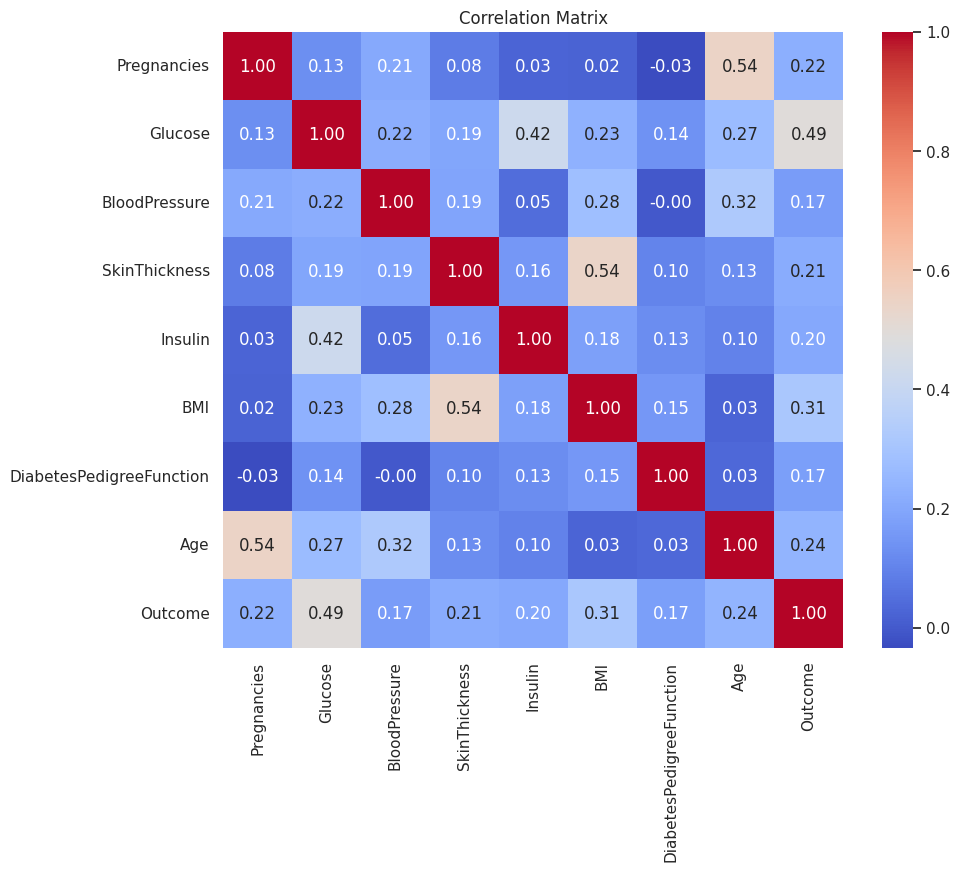

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot a heatmap to visualize correlation between all features
# Check correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [95]:
# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (768, 8)
Target shape: (768,)


In [96]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 614
Testing samples: 154


In [97]:
from sklearn.preprocessing import StandardScaler
# Standardization rescales the features so they have a mean of 0 and standard deviation of 1

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [100]:
import joblib

joblib.dump(lr, 'models/logistic_model.pkl')
print("Model saved to models/logistic_model.pkl")


Model saved to models/logistic_model.pkl


In [101]:
joblib.dump(scaler, 'models/scaler.pkl')
print("Scaler saved to models/scaler.pkl")

Scaler saved to models/scaler.pkl


Random Forest Classifier Model

Random Forest Accuracy: 0.7337662337662337

Confusion Matrix:
 [[78 21]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



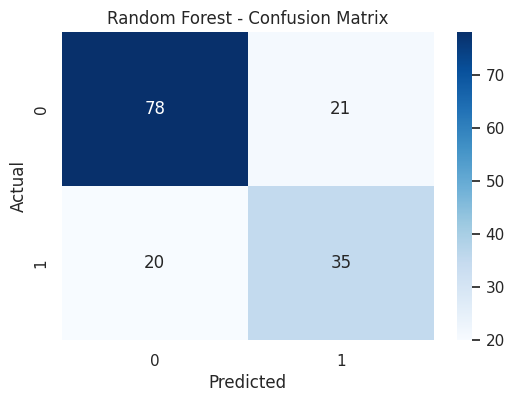

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

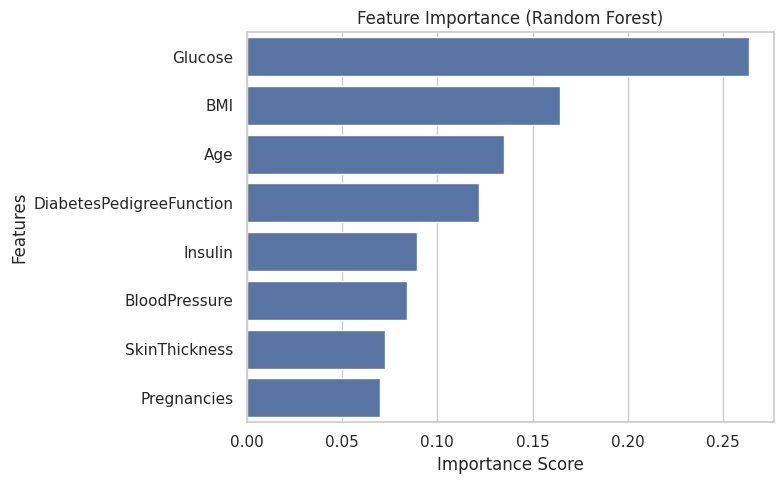

In [103]:
# Feature Importance for Random Forest
import numpy as np

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Support Vector Machine (SVM) Classifier

SVM Accuracy: 0.7467532467532467

Confusion Matrix:
 [[83 16]
 [23 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



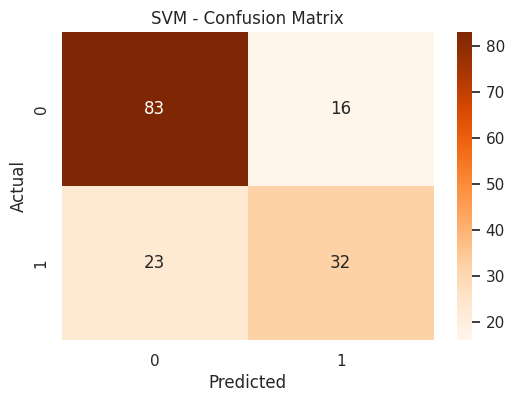

In [104]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

svm_pred = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost

XGBoost Accuracy: 0.7142857142857143

Confusion Matrix:
 [[73 26]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



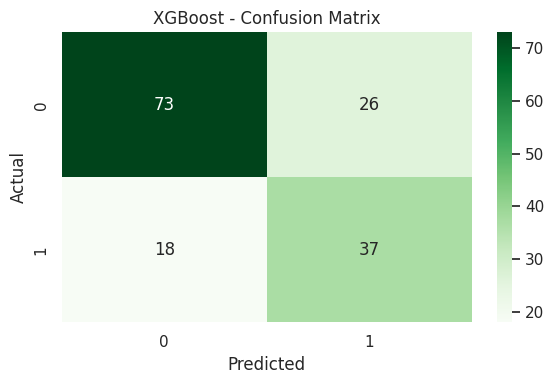

In [105]:
!pip install xgboost --quiet

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

xgb_pred = xgb.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Gradient Boosting Classifier

Gradient Boosting Accuracy: 0.7597402597402597

Confusion Matrix:
 [[79 20]
 [17 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



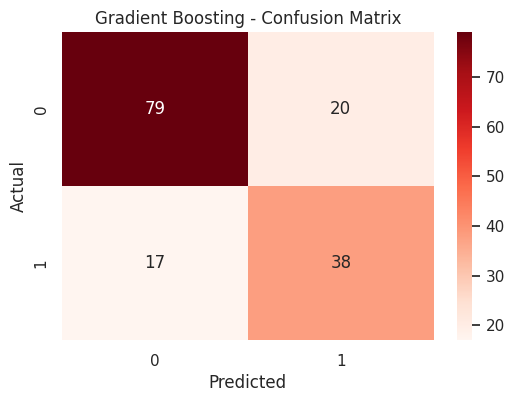

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

gb_pred = gb.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [107]:
import joblib
joblib.dump(lr, 'models/logistic_model.pkl')

joblib.dump(rf, 'models/random_forest_model.pkl')

joblib.dump(svm, 'models/svm_model.pkl')

joblib.dump(xgb, 'models/xgboost_model.pkl')

joblib.dump(gb, 'models/gradient_boosting_model.pkl')

joblib.dump(scaler, 'models/scaler.pkl')

print("All models and scaler saved successfully to /models/")

All models and scaler saved successfully to /models/


Extra Trees Classifier

Extra Trees Accuracy: 0.7662337662337663

Confusion Matrix:
 [[81 18]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



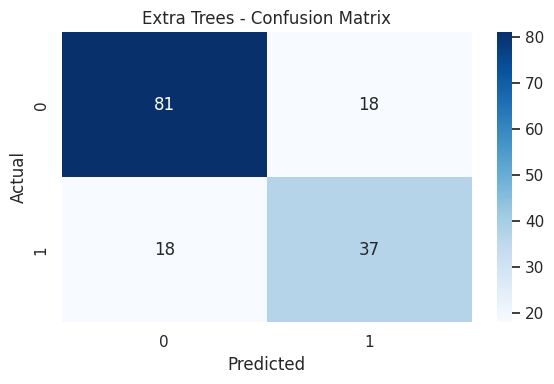

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

et = ExtraTreesClassifier(random_state=42)
et.fit(X_train_scaled, y_train)
et_pred = et.predict(X_test_scaled)

print("Extra Trees Accuracy:", accuracy_score(y_test, et_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, et_pred))
print("\nClassification Report:\n", classification_report(y_test, et_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, et_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Extra Trees - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Light GBM Classifier

LightGBM Accuracy: 0.7207792207792207

Confusion Matrix:
 [[74 25]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



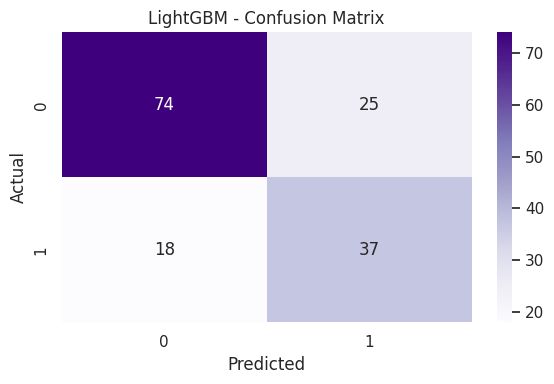

In [109]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)

print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lgbm_pred))
print("\nClassification Report:\n", classification_report(y_test, lgbm_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lgbm_pred), annot=True, fmt='d', cmap='Purples')
plt.title("LightGBM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

AdaBoost Classifier

AdaBoost Accuracy: 0.7532467532467533

Confusion Matrix:
 [[78 21]
 [17 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



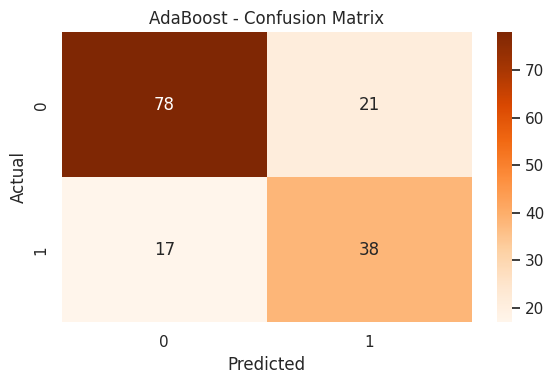

In [110]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)

print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ada_pred))
print("\nClassification Report:\n", classification_report(y_test, ada_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, ada_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [111]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(et, "models/extratrees_model.pkl")

joblib.dump(ada, "models/adaboost_model.pkl")

joblib.dump(lgbm, "models/lightgbm_model.pkl")

print("Extra Trees, AdaBoost, and LightGBM models saved successfully!")


Extra Trees, AdaBoost, and LightGBM models saved successfully!


KNeighbors Classifier

KNN Accuracy: 0.7207792207792207

Confusion Matrix:
 [[74 25]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



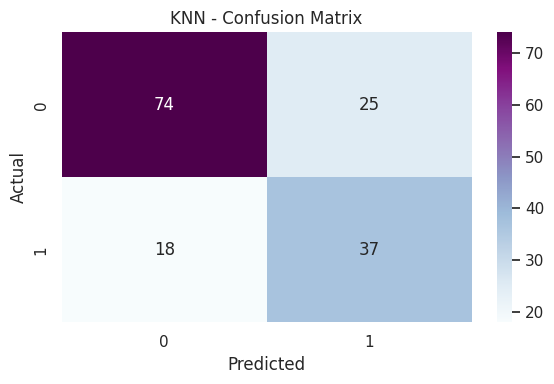

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='BuPu')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [113]:
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    print(f"k={k} → Accuracy: {accuracy_score(y_test, y_pred_k):.4f}")


k=1 → Accuracy: 0.6558
k=2 → Accuracy: 0.6558
k=3 → Accuracy: 0.7208
k=4 → Accuracy: 0.7273
k=5 → Accuracy: 0.7208
k=6 → Accuracy: 0.7143
k=7 → Accuracy: 0.7078
k=8 → Accuracy: 0.7273
k=9 → Accuracy: 0.7403
k=10 → Accuracy: 0.7597
k=11 → Accuracy: 0.7662
k=12 → Accuracy: 0.7922
k=13 → Accuracy: 0.7662
k=14 → Accuracy: 0.7662
k=15 → Accuracy: 0.7532
k=16 → Accuracy: 0.7597
k=17 → Accuracy: 0.7532
k=18 → Accuracy: 0.7532
k=19 → Accuracy: 0.7662
k=20 → Accuracy: 0.7597


In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn_final = KNeighborsClassifier(n_neighbors=12)
knn_final.fit(X_train_scaled, y_train)
knn_pred = knn_final.predict(X_test_scaled)

print("Final KNN (k=12) Accuracy:", accuracy_score(y_test, knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

Final KNN (k=12) Accuracy: 0.7922077922077922

Confusion Matrix:
 [[87 12]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [115]:
import joblib

joblib.dump(knn_final, 'models/knn_model_k12.pkl')
print("Final KNN model saved to models/knn_model_k12.pkl")

joblib.dump(scaler, 'models/scaler.pkl')
print("Scaler saved to models/scaler.pkl")

Final KNN model saved to models/knn_model_k12.pkl
Scaler saved to models/scaler.pkl


KMeans

K-Means Accuracy (cluster match): 0.6623376623376623

Confusion Matrix:
 [[59 40]
 [12 43]]


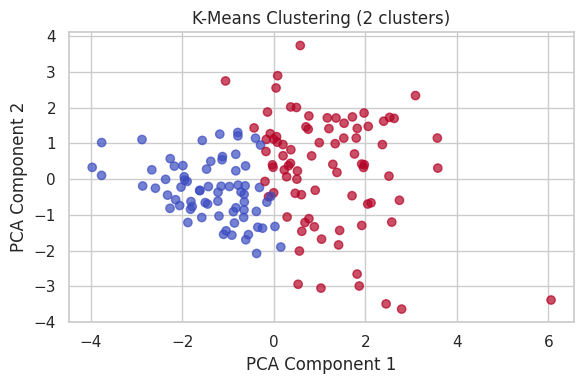

In [116]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

cluster_labels = kmeans.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score

original_accuracy = accuracy_score(y_test, cluster_labels)
inverted_accuracy = accuracy_score(y_test, 1 - cluster_labels)

final_accuracy = max(original_accuracy, inverted_accuracy)
print("K-Means Accuracy (cluster match):", final_accuracy)

mapped_labels = cluster_labels if original_accuracy > inverted_accuracy else 1 - cluster_labels
print("\nConfusion Matrix:\n", confusion_matrix(y_test, mapped_labels))

pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=mapped_labels, cmap='coolwarm', alpha=0.7)
plt.title("K-Means Clustering (2 clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

In [117]:
import joblib
joblib.dump(kmeans, "models/kmeans_model.pkl")
print("K-Means model saved.")

K-Means model saved.


DBSCAN

DBSCAN Accuracy (excluding noise): 0.6865671641791045

 Confusion Matrix:
 [[46  0]
 [21  0]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        46
           1       0.00      0.00      0.00        21

    accuracy                           0.69        67
   macro avg       0.34      0.50      0.41        67
weighted avg       0.47      0.69      0.56        67



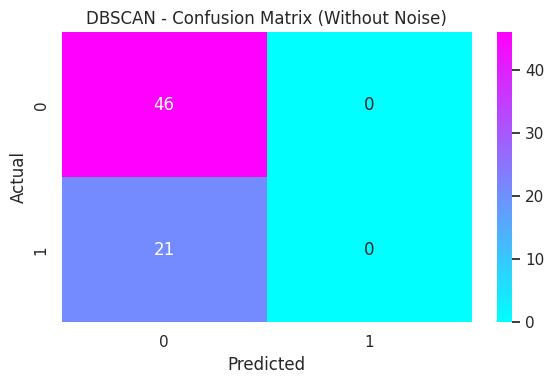

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_test_scaled)

cluster_df = pd.DataFrame({'cluster': clusters, 'actual': y_test.values})

cluster_df = cluster_df[cluster_df['cluster'] != -1]

mapping = cluster_df.groupby('cluster')['actual'].agg(lambda x: x.value_counts().index[0]).to_dict()
mapped_preds = [mapping.get(label, 0) for label in clusters]

filtered_preds = [p for i, p in enumerate(mapped_preds) if clusters[i] != -1]
filtered_true = [y_test.values[i] for i in range(len(y_test)) if clusters[i] != -1]

print("DBSCAN Accuracy (excluding noise):", accuracy_score(filtered_true, filtered_preds))
print("\n Confusion Matrix:\n", confusion_matrix(filtered_true, filtered_preds))
print("\n Classification Report:\n", classification_report(filtered_true, filtered_preds, zero_division=0))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(filtered_true, filtered_preds), annot=True, fmt='d', cmap='cool')
plt.title("DBSCAN - Confusion Matrix (Without Noise)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [119]:
for eps in [0.5, 1.0, 1.2, 1.5]:
    for min_pts in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        preds = dbscan.fit_predict(X_test_scaled)
        print(f"eps={eps}, min_samples={min_pts} → unique labels:", set(preds))


eps=0.5, min_samples=3 → unique labels: {np.int64(-1)}
eps=0.5, min_samples=5 → unique labels: {np.int64(-1)}
eps=0.5, min_samples=10 → unique labels: {np.int64(-1)}
eps=1.0, min_samples=3 → unique labels: {np.int64(0), np.int64(1), np.int64(-1)}
eps=1.0, min_samples=5 → unique labels: {np.int64(-1)}
eps=1.0, min_samples=10 → unique labels: {np.int64(-1)}
eps=1.2, min_samples=3 → unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}
eps=1.2, min_samples=5 → unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}
eps=1.2, min_samples=10 → unique labels: {np.int64(-1)}
eps=1.5, min_samples=3 → unique labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}
eps=1.5, min_samples=5 → unique labels: {np.int64(0), np.int64(-1)}
eps=1.5, min_samples=10 → unique labels: {np.int64(0), np.int64(-1)}


Neural Network MLPClassifier

Neural Network (MLP) Accuracy: 0.7142857142857143

Confusion Matrix:
 [[75 24]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



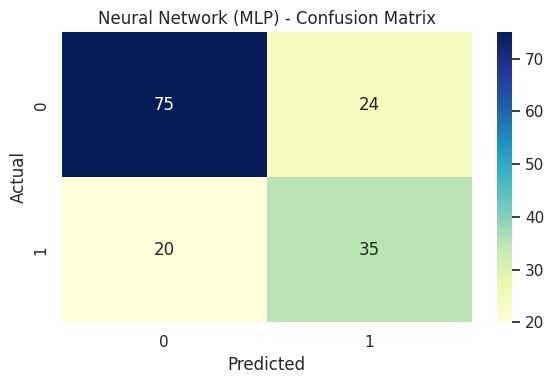

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

mlp_pred = mlp.predict(X_test_scaled)

print("Neural Network (MLP) Accuracy:", accuracy_score(y_test, mlp_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, mlp_pred))
print("\nClassification Report:\n", classification_report(y_test, mlp_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Neural Network (MLP) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [121]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp1.fit(X_train_scaled, y_train)
mlp1_pred = mlp1.predict(X_test_scaled)

print("Improved MLP #1 Accuracy:", accuracy_score(y_test, mlp1_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, mlp1_pred))
print("\nClassification Report:\n", classification_report(y_test, mlp1_pred))


Improved MLP #1 Accuracy: 0.7142857142857143

Confusion Matrix:
 [[75 24]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



In [122]:
mlp2 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, early_stopping=True, random_state=42)
mlp2.fit(X_train_scaled, y_train)
mlp2_pred = mlp2.predict(X_test_scaled)

print("Improved MLP #2 Accuracy:", accuracy_score(y_test, mlp2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, mlp2_pred))
print("\nClassification Report:\n", classification_report(y_test, mlp2_pred))


Improved MLP #2 Accuracy: 0.7467532467532467

Confusion Matrix:
 [[81 18]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



In [123]:
mlp3 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh', max_iter=1000, early_stopping=True, random_state=42)
mlp3.fit(X_train_scaled, y_train)
mlp3_pred = mlp3.predict(X_test_scaled)

print("Improved MLP #3 Accuracy:", accuracy_score(y_test, mlp3_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, mlp3_pred))
print("\nClassification Report:\n", classification_report(y_test, mlp3_pred))


Improved MLP #3 Accuracy: 0.7662337662337663

Confusion Matrix:
 [[82 17]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [124]:
import joblib

joblib.dump(mlp3, 'models/mlp_best_model.pkl')
print("MLP model saved to models/mlp_best_model.pkl")

MLP model saved to models/mlp_best_model.pkl


GaussianNB

Naive Bayes Accuracy: 0.7532467532467533

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



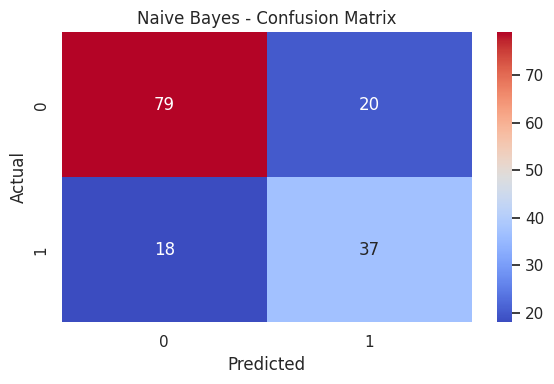

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

nb_pred = nb.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [126]:
import joblib

joblib.dump(nb, 'models/naive_bayes_model.pkl')
print("Naive Bayes model saved to models/naive_bayes_model.pkl")

Naive Bayes model saved to models/naive_bayes_model.pkl


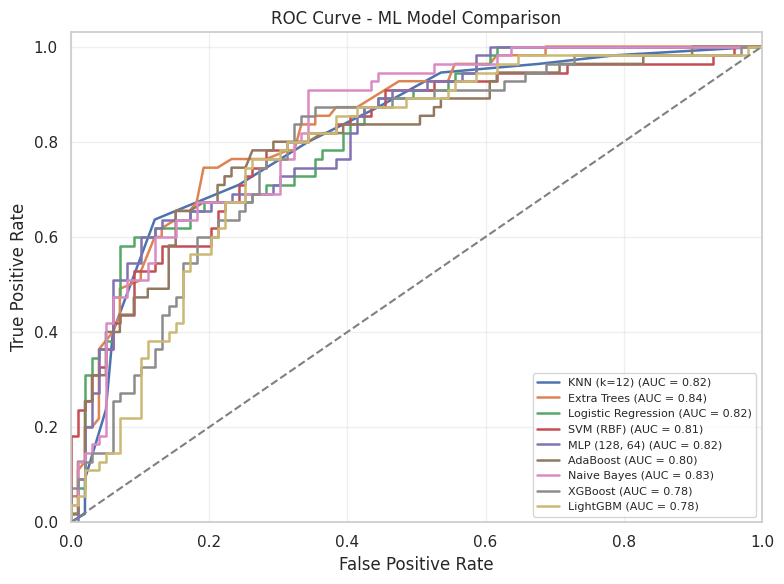

In [127]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "KNN (k=12)": knn_final,
    "Extra Trees": et,
    "Logistic Regression": lr,
    "SVM (RBF)": svm,
    "MLP (128, 64)": mlp3,
    "AdaBoost": ada,
    "Naive Bayes": nb,
    "XGBoost": xgb,
    "LightGBM": lgbm,
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_scaled)
    else:
        y_scores = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.8, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Model Comparison')
plt.legend(loc="lower right", fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Decision Tree

Decision Tree Accuracy: 0.7142857142857143

Confusion Matrix:
 [[76 23]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



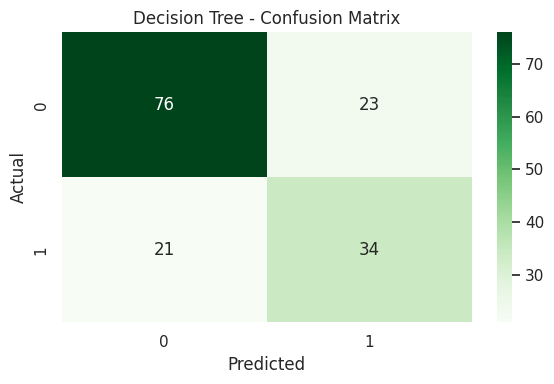

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

dt_pred = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

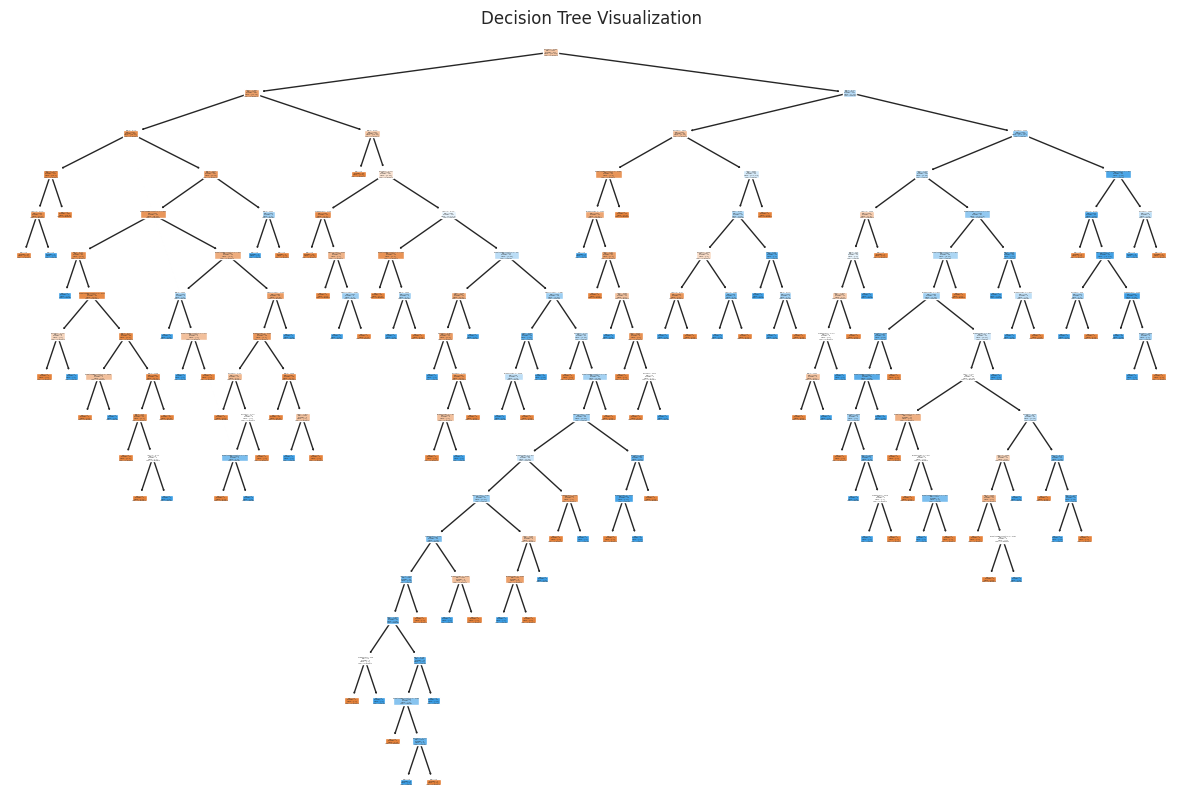

In [129]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization")
plt.show()

In [146]:
import joblib

joblib.dump(knn_final, 'final_knn_model.pkl')
joblib.dump(et, 'et_model.pkl')
joblib.dump(ada, 'ada_model.pkl')
joblib.dump(lgbm, 'lgbm_model.pkl')
joblib.dump(xgb, 'xgboost_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(mlp3, 'mlp_model.pkl')
joblib.dump(nb, 'nb_model.pkl')
joblib.dump(dt, 'dt_model.pkl')
joblib.dump(lr, 'lr_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [150]:
import joblib
import numpy as np
import pandas as pd

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

new_data = pd.DataFrame([[2, 100, 70, 30, 80, 25.0, 0.5, 35]], columns=columns)

scaler = joblib.load("scaler.pkl")
new_data_scaled = scaler.transform(new_data)

models_info = {
    'KNN': 'final_knn_model.pkl',
    'Extra Trees': 'et_model.pkl',
    'AdaBoost': 'ada_model.pkl',
    'LightGBM': 'lgbm_model.pkl',
    'XGBoost': 'xgboost_model.pkl',
    'SVM': 'svm_model.pkl',
    'MLP Neural Net': 'mlp_model.pkl',
    'Naive Bayes': 'nb_model.pkl',
    'Decision Tree': 'dt_model.pkl',
    'Logistic Regression': 'lr_model.pkl',
}

print(" Prediction Summary:\n")

for model_name, filename in models_info.items():
    try:
        model = joblib.load(filename)
        prob = model.predict_proba(new_data_scaled)[0][1]
        if prob >= 0.5:
            print(f"{model_name}: Diabetic ({prob * 100:.2f}%)")
        else:
            print(f"{model_name}: Not Diabetic")
    except Exception as e:
        print(f"{model_name}: Model not found or error: {e}")


 Prediction Summary:

KNN: Not Diabetic
Extra Trees: Not Diabetic
AdaBoost: Not Diabetic
LightGBM: Not Diabetic
XGBoost: Not Diabetic
SVM: Not Diabetic
MLP Neural Net: Not Diabetic
Naive Bayes: Not Diabetic
Decision Tree: Not Diabetic
Logistic Regression: Not Diabetic


In [151]:
import joblib
import numpy as np
import pandas as pd

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

new_data = pd.DataFrame([[2, 100, 70, 30, 80, 25.0, 0.5, 35]], columns=columns)

scaler = joblib.load("scaler.pkl")
new_data_scaled = scaler.transform(new_data)

models_info = {
    'KNN': 'final_knn_model.pkl',
    'Extra Trees': 'et_model.pkl',
    'AdaBoost': 'ada_model.pkl',
    'LightGBM': 'lgbm_model.pkl',
    'XGBoost': 'xgboost_model.pkl',
    'SVM': 'svm_model.pkl',
    'MLP Neural Net': 'mlp_model.pkl',
    'Naive Bayes': 'nb_model.pkl',
    'Decision Tree': 'dt_model.pkl',
    'Logistic Regression': 'lr_model.pkl',
}

print("Prediction Summary:\n")

for model_name, filename in models_info.items():
    try:
        model = joblib.load(filename)
        prob = model.predict_proba(new_data_scaled)[0][1]
        prediction = model.predict(new_data_scaled)[0]
        label = "Diabetic" if prediction == 1 else "Not Diabetic"
        print(f"{model_name}: {label} → Chance of becoming diabetic: {prob * 100:.2f}%")
    except Exception as e:
        print(f"{model_name}: Error or model not found - {e}")

Prediction Summary:

KNN: Not Diabetic → Chance of becoming diabetic: 0.00%
Extra Trees: Not Diabetic → Chance of becoming diabetic: 15.00%
AdaBoost: Not Diabetic → Chance of becoming diabetic: 37.34%
LightGBM: Not Diabetic → Chance of becoming diabetic: 0.10%
XGBoost: Not Diabetic → Chance of becoming diabetic: 0.33%
SVM: Not Diabetic → Chance of becoming diabetic: 17.96%
MLP Neural Net: Not Diabetic → Chance of becoming diabetic: 8.37%
Naive Bayes: Not Diabetic → Chance of becoming diabetic: 3.17%
Decision Tree: Not Diabetic → Chance of becoming diabetic: 0.00%
Logistic Regression: Not Diabetic → Chance of becoming diabetic: 9.11%


In [153]:
import joblib
import pandas as pd

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
new_data = pd.DataFrame([[5, 150, 85, 35, 120, 33.0, 0.6, 45]], columns=columns)

scaler = joblib.load("scaler.pkl")
new_data_scaled = scaler.transform(new_data)

models_info = {
    'KNN': 'final_knn_model.pkl',
    'Extra Trees': 'et_model.pkl',
    'AdaBoost': 'ada_model.pkl',
    'LightGBM': 'lgbm_model.pkl',
    'XGBoost': 'xgboost_model.pkl',
    'SVM': 'svm_model.pkl',
    'MLP Neural Net': 'mlp_model.pkl',
    'Naive Bayes': 'nb_model.pkl',
    'Decision Tree': 'dt_model.pkl',
    'Logistic Regression': 'lr_model.pkl',
}

print("\n Prediction Summary for New Input:\n")

for name, path in models_info.items():
    try:
        model = joblib.load(path)
        prediction = model.predict(new_data_scaled)[0]
        result = "Diabetic" if prediction == 1 else "Not Diabetic"
        print(f"{name}: {result}")
    except Exception as e:
        print(f"{name}: Error - {e}")



 Prediction Summary for New Input:

KNN: Diabetic
Extra Trees: Diabetic
AdaBoost: Diabetic
LightGBM: Diabetic
XGBoost: Diabetic
SVM: Diabetic
MLP Neural Net: Diabetic
Naive Bayes: Diabetic
Decision Tree: Diabetic
Logistic Regression: Diabetic
